 ### Derin öğrenme modelleri oluşturmak için kersı içe akatarlım

In [1]:
from keras import layers
from keras.models import Sequential

### CNN Modelimizi oluşturalım (sequentila) şeklinde

In [2]:
model=Sequential()# Bu sınıf (Sequential), katmanları sıralı olarak eklemenizi sağlar.
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3))) #Bu katman, 32 filtre içerir, her biri 3x3 boyutundadır,  ReLU aktivasyon fonksiyonu kullanılır ve giriş boyutu (input_shape) 150x150 piksel ve 3 renk kanalıdır (RGB) renk kanalı
model.add(layers.MaxPooling2D((2,2))) # 2x2 boyutundaki bir pencere üzerinde maksimum değeri alarak resmi özetler.

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten()) #  evrişim ve havuzlama katmanlarından gelen çıkışları düzleştirir.

model.add(layers.Dense(512,activation="relu")) # Bu, tam bağlantılı bir gizli katman ekler. Bu katman 512 nöron içerir ve ReLU aktivasyon fonksiyonunu kullanır.
model.add(layers.Dense(1,activation="sigmoid")) #  Bu, çıkış katmanını ekler. Burada sadece bir nöron var çünkü bu örnek bir ikili sınıflandırma modelidir ve sigmoid aktivasyon fonksiyonu kullanılır.

In [3]:
model.summary() # oluşturulan modelinin özetini ekrana basar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:

from tensorflow.keras.optimizers.legacy import RMSprop as LegacyRMSprop
optimizer = LegacyRMSprop(learning_rate=1e-4)  # Bu satır, LegacyRMSprop optimizasyonunu bir örnekle başlatır ve belirtilen öğrenme hızı (learning rate) ile yapılandırır.
model.compile(                                 # Bu fonksiyon, modeli derler ve eğitim için hazır hale getirir. Kayıp fonksiyonu (binary_crossentropy), optimizer (LegacyRMSprop), ve metrikler (acc - doğruluk) belirtilir.
    loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=["acc"] #  Modelin doğru sınıflandırma yüzdesini izler.
)


from tensorflow.keras import optimizers # compile fonksiyonu, modelin kayıp fonksiyonunu (loss function), optimizer'ı ve eğitim sırasında izlenecek metrikleri belirler.
model.compile(loss="binary_crossentropy",  # Bu, ikili sınıflandırma problemleri için kullanılan bir kayıp fonksiyonunu belirtir
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Optimizer, ağırlıkları güncellemek için kullanılan bir algoritmadır. 
              metrics=["acc"] # Modelin doğru sınıflandırma yüzdesini izler.
              )


In [ ]:
# bu kod normal intel pc için kulanılır 
"""from tensorflow.keras import optimizers # compile fonksiyonu, modelin kayıp fonksiyonunu (loss function), optimizer'ı ve eğitim sırasında izlenecek metrikleri belirler.
model.compile(loss="binary_crossentropy",  # Bu, ikili sınıflandırma problemleri için kullanılan bir kayıp fonksiyonunu belirtir
              optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Optimizer, ağırlıkları güncellemek için kullanılan bir algoritmadır. 
              metrics=["acc"] # Modelin doğru sınıflandırma yüzdesini izler.
              )"""

In [8]:
from keras.preprocessing.image import ImageDataGenerator  #  Keras'ın ImageDataGenerator sınıfını kullanarak veri setini hazırlar. bunu veri artırmada da kulanılacak
train_datagen=ImageDataGenerator(rescale=1./255) # Bu satır, eğitim veri seti için bir ImageDataGenerator örneği oluşturur. rescale=1./255, görüntü piksel değerlerini 0 ile 1 arasında ölçeklendirir, bu da genellikle veri setini normalize etmek için kullanılır
validation_datagen=ImageDataGenerator(rescale=1./255) # Bu satır, doğrulama (validation) veri seti için bir ImageDataGenerator örneği oluşturur. Eğitimde olduğu gibi, burada da görüntü piksel değerleri 0 ile 1 arasında ölçeklendirilir

In [9]:
train_directory="/Users/abdulbarisoylemez/Documents/Visual Code/kat_dog/train" # eğitim veri setinin bulunduğu dizin yolunu içerir
validation_directory="/Users/abdulbarisoylemez/Documents/Visual Code/kat_dog/validation" # Bu değişken, doğrulama (validation) veri setinin bulunduğu dizin yolunu içerir.Doğrulama veri seti, modelin eğitim sırasında genelleştirme yeteneğini değerlendirmek ve aşırı öğrenmeyi kontrol etmek için kullanılır.

In [10]:
train_generator=train_datagen.flow_from_directory(train_directory,target_size=(150,150),  # target_size tum görintiler bu boyuta içeriye aktarılacaktır
                                                  batch_size=20,class_mode="binary") # batch_size=20: Eğitim sırasında her adımda kullanılacak örnek sayısını belirtir
validation_generator=validation_datagen.flow_from_directory(validation_directory,target_size=(150,150),
                                                  batch_size=20,class_mode="binary")# class_mode İki sınıflı ikili sınıflandırma problemi olduğu belirtilir.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Modeli eğitimeye başlıyalım 

In [11]:
history = model.fit(
    train_generator,  # Eğitim veri seti üzerindeki veri akışını belirtir.
    epochs=20,  # Toplam eğitim döngü sayısını belirtir.
    validation_data=validation_generator,  # Doğrulama veri seti üzerindeki veri akışını belirtir.
    validation_steps=50  # Her doğrulama döngüsünde alınacak adım sayısını belirtir.
)


Epoch 1/20


2023-11-10 11:36:39.801932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-11-10 11:36:39.827490: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.5310

2023-11-10 11:36:54.191894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 17s 162ms/step - loss: 0.6906 - acc: 0.5310 - val_loss: 0.6669 - val_acc: 0.5950
Epoch 2/20
100/100 [==============================] - 16s 158ms/step - loss: 0.6566 - acc: 0.6065 - val_loss: 0.6440 - val_acc: 0.6160
Epoch 3/20
100/100 [==============================] - 17s 170ms/step - loss: 0.6043 - acc: 0.6615 - val_loss: 0.6752 - val_acc: 0.5690
Epoch 4/20
100/100 [==============================] - 17s 166ms/step - loss: 0.5649 - acc: 0.7125 - val_loss: 0.5633 - val_acc: 0.7080
Epoch 5/20
100/100 [==============================] - 18s 177ms/step - loss: 0.5442 - acc: 0.7210 - val_loss: 0.5531 - val_acc: 0.7160
Epoch 6/20
100/100 [==============================] - 17s 171ms/step - loss: 0.5232 - acc: 0.7295 - val_loss: 0.5442 - val_acc: 0.7240
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.4989 - acc: 0.7510 - val_loss: 0.5486 - val_acc: 0.7230
Epoch 8/20
100/100 [==============================] - 18s 177ms/st

### Modeli görseleştirelim

/var/folders/7m/ml2l2z8s1mv3tkbmb_ftbp240000gn/T/ipykernel_1565/1220348558.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


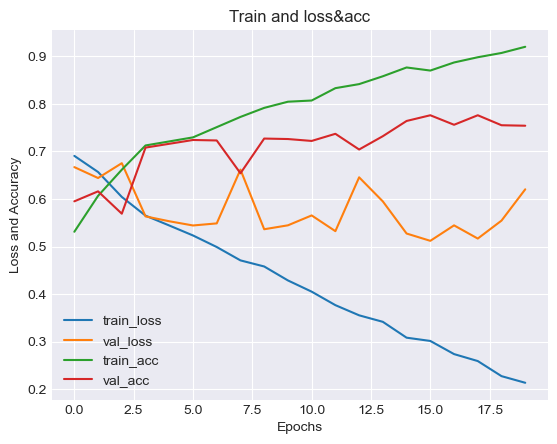

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib stilini belirle
plt.style.use("seaborn-darkgrid")  

# Yeni bir grafik oluştur
plt.figure()

# Eğitim sürecinin toplam döngü sayısı (epochs)
epochs = 20

# Eğitim kaybı (train_loss) ve doğrulama kaybı (val_loss) için çizgi grafiği oluştur
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")

# Eğitim doğruluğu (train_acc) ve doğrulama doğruluğu (val_acc) için çizgi grafiği oluştur
plt.plot(np.arange(0, epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_acc"], label="val_acc")  

# Grafik başlığını ve eksen etiketlerini belirle
plt.title("Train and loss&acc")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")

# Grafikteki çizgileri etiketle ve konumu belirle
plt.legend(loc="lower left")

# Grafiği göster
plt.show()


grafiğe baktığımız zaman (validation cizgilerinden)  Modelimiz ezberleme yoluna gitiğini görüyoruz şimdi yeni model oluşturalım 

In [19]:
model2=Sequential()
model2.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64,(3,3),activation="relu"))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128,(3,3),activation="relu"))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128,(3,3),activation="relu"))
model2.add(layers.MaxPooling2D((2,2)))


model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4)) # aşırı öğrenmeyi azaltmaya yardımcı olur , Bu katman, her eğitim adımında belirli bir yüzde oranındaki %40 nöronları rastgele "bırakır" (değişkenlere sıfır atar). Bu, modelin farklı nöronlara dayanarak öğrenmesini sağlar ve aşırı öğrenmeyi engeller.

model2.add(layers.Dense(512,activation="relu"))
model2.add(layers.Dense(1,activation="sigmoid"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [20]:
model2.compile(  # Bu fonksiyon, modeli derler ve eğitim için hazır hale getirir. Kayıp fonksiyonu (binary_crossentropy), optimizer (LegacyRMSprop), ve metrikler (acc - doğruluk) belirtilir.
    loss="binary_crossentropy",  # Kayıp fonksiyonu, modelin eğitim sırasında ne kadar yanıldığını ölçer.
    optimizer=LegacyRMSprop(learning_rate=1e-4),  # Optimizer, ağırlıkları güncellemek için kullanılan algoritmayı belirler.
    metrics=["acc"]  
)


 ### Veri artırma kısmına geldik , mevcut eğitim veri setini çeşitlendirmek için çeşitli dönüşümler ve değişiklikler uygulayarak modelin genelleme yeteneğini artırmayı amaçlar. 

In [21]:
train_datagen_yeni=ImageDataGenerator(rescale=1./255, # Görüntü piksel değerlerini 0-1 aralığına ölçeklendirir.
                                      rotation_range=40, #  0 ile 45 derece arasında rastgele rotasyon uygular.
                                      width_shift_range=0.4, # Görüntü genişliğini yatayda rastgele kaydırma uygular (0.4 oranında).
                                      height_shift_range=0.3, # Görüntü yüksekliğini dikeyde rastgele kaydırma uygular (0.3 oranında).
                                      shear_range=0.4,  #  Görüntüyü rastgele şekillendirir (0.4 oranında).
                                      zoom_range=0.3, #  Görüntüyü rastgele yakınlaştırır (0.3 oranında).
                                      horizontal_flip=True, # Görüntüyü yatayda rastgele çevirir.
                                      vertical_flip=True,  # Görüntüyü dikeyde rastgele çevirir. 
                                      fill_mode="neares")  # Dönüşümler sırasında oluşan boşlukları doldurmak için kullanılan dolgu modunu belirler (en yakın piksel değeri ile doldurur).

validation_datagen_yeni = ImageDataGenerator(rescale=1./255)


In [22]:
train_generator_yeni = train_datagen_yeni.flow_from_directory( 
    train_directory,  # Eğitim veri setinin bulunduğu dizin
    target_size=(150, 150), 
    batch_size=16,  # Mini-batch boyutu
    class_mode="binary" 
)

validation_generator_yeni = validation_datagen_yeni.flow_from_directory(
    train_directory,  # Doğrulama veri setinin bulunduğu dizin
    target_size=(150, 150),  
    batch_size=16, 
    class_mode="binary" 
)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


veri artırma uygulanan train_generator_yeni veri akışını kullanarak, model2 adlı bir Convolutional Neural Network (CNN) modelini eğitir. İşte bu kodun ayrıntıları:

In [23]:
history2=model2.fit(train_generator,# eğitim veri seti için kullanılacak olan veri akışıdır. Veri artırma teknikleri bu veri akışı üzerinde uygulanır.
                  epochs=50,
                  validation_data=validation_generator_yeni,
                  validation_steps=50)

Epoch 1/50


2023-11-10 13:08:08.629357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6959 - acc: 0.5165

2023-11-10 13:08:22.864241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 17s 162ms/step - loss: 0.6959 - acc: 0.5165 - val_loss: 0.6795 - val_acc: 0.5412
Epoch 2/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6796 - acc: 0.5710 - val_loss: 0.6647 - val_acc: 0.5650
Epoch 3/50
100/100 [==============================] - 16s 159ms/step - loss: 0.6514 - acc: 0.6155 - val_loss: 0.6200 - val_acc: 0.6787
Epoch 4/50
100/100 [==============================] - 16s 163ms/step - loss: 0.6257 - acc: 0.6500 - val_loss: 0.6060 - val_acc: 0.6775
Epoch 5/50
100/100 [==============================] - 17s 165ms/step - loss: 0.5873 - acc: 0.6905 - val_loss: 0.5521 - val_acc: 0.7250
Epoch 6/50
100/100 [==============================] - 17s 170ms/step - loss: 0.5637 - acc: 0.7040 - val_loss: 0.4846 - val_acc: 0.7850
Epoch 7/50
100/100 [==============================] - 17s 174ms/step - loss: 0.5367 - acc: 0.7300 - val_loss: 0.4713 - val_acc: 0.7987
Epoch 8/50
100/100 [==============================] - 17s 165ms/st

/var/folders/7m/ml2l2z8s1mv3tkbmb_ftbp240000gn/T/ipykernel_1565/2634263623.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


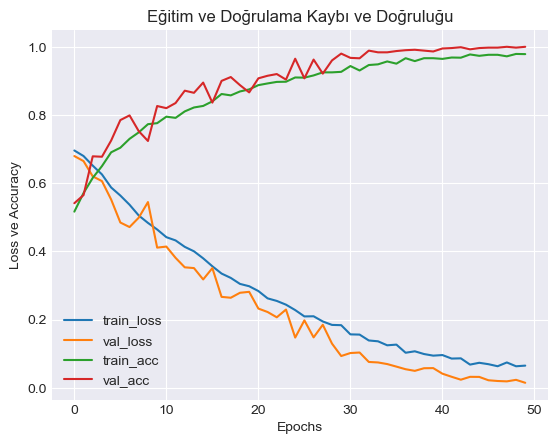

In [24]:
plt.style.use("seaborn-darkgrid")
plt.figure()

epochs = 50  

# Eğitim loss ve doğrulama loss değerlerini çiz
plt.plot(np.arange(0, epochs), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history2.history["val_loss"], label="val_loss")

# Eğitim accuracy ve doğrulama accuracy değerlerini çiz
plt.plot(np.arange(0, epochs), history2.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), history2.history["val_acc"], label="val_acc")

# Grafiği düzenleme
plt.title("Eğitim ve Doğrulama Kaybı ve Doğruluğu")
plt.xlabel("Epochs")
plt.ylabel("Loss ve Accuracy")
plt.legend(loc="lower left")
plt.show()


### görüntü tahminleri görseleştirelim

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array # bir görüntüyü dosyadan yüklemek için kullanılırken "img_to_array" bir PIL görüntüsünü bir NumPy dizisine dönüştürmek için kullanılır.
from tensorflow.keras.models import load_model  # Keras'ta eğitilmiş bir modeli yüklemek için kullanılır
import numpy as np


In [27]:
model.save("model2.h5") # modeli kaydedelim

In [55]:
model_path="model2.h5"
image_path="/Users/abdulbarisoylemez/Documents/Visual Code/kat_dog/test/dog/dog.4070.jpg" # Tahmin yapmak istediğiniz görüntünün yolu

<PIL.Image.Image image mode=RGB size=150x150 at 0x17FC7FF10>


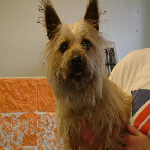

In [56]:
# Eğitilmiş modeli yükleyelim
predict_model = load_model(model_path)

# Test görüntüsünü yükleyelim ve boyutlandıralım
test_image = load_img(image_path, target_size=(150, 150))
print(test_image)
test_image

In [57]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 150, 150, 3)


In [58]:
# Modeli kullanarak tahmin yapalım
result = predict_model.predict(test_image)
print(result)

1/1 [==============================] - 0s 43ms/step
[[1.]]


In [59]:
# Tahmin sonuçlarına göre bir etiket belirleyelim
if result[0][0] > 0.5:
    print("Dog")
    label = "Dog"
else:
    print("Cat")
    label = "Cat"


Dog


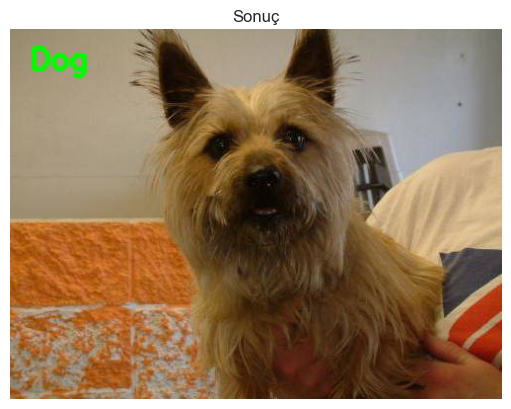

In [60]:
import cv2
import matplotlib.pyplot as plt

test_image_cv2 = cv2.imread(image_path)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(test_image_cv2, label, (20, 40), font, 1.0, (0, 250, 0), 3)
test_image_rgb = cv2.cvtColor(test_image_cv2, cv2.COLOR_BGR2RGB)

plt.imshow(test_image_rgb)
plt.title("Sonuç")
plt.axis('off')  
plt.show()